In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import warnings

# Suppressing all warnings
warnings.filterwarnings('ignore')

# EDA & PREPROCESSING

In [23]:
# Loading the data into a DataFrame
file_path ="C:/Users/USER/OneDrive - University of Lincoln/Desktop/Tracy/Work/Portofolio/Projects/Data/Fraud Detection/PS_20174392719_1491204439457_log.csv"
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [24]:
# Getting a summary of the dataset
print(data.info())

# Displaying summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04

In [25]:
print("Number of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 0


In [26]:
data['isFraud'] = data['isFraud'].astype(str) 


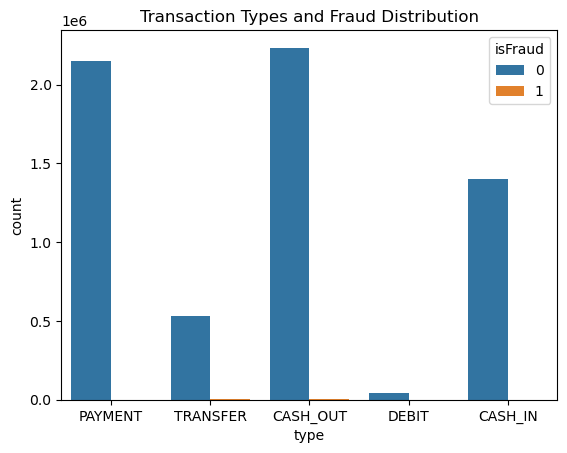

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='type', hue='isFraud')
plt.title('Transaction Types and Fraud Distribution')
plt.show()


In [27]:
fraud_cases = data[data['isFraud'] == '1']  
fraud_count_by_type = fraud_cases['type'].value_counts()
print(fraud_count_by_type)


CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


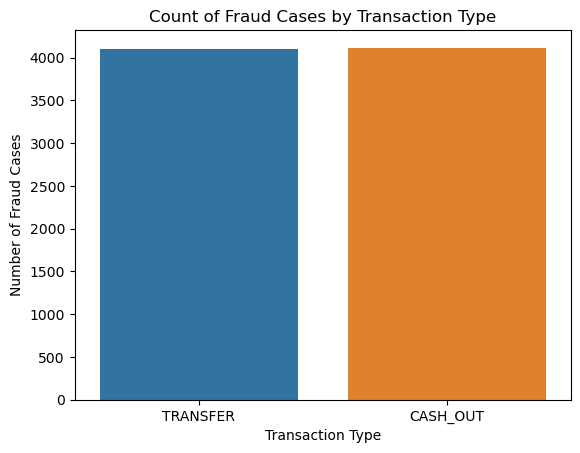

In [28]:
sns.countplot(data=fraud_cases, x='type')
plt.title('Count of Fraud Cases by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Cases')
plt.show()


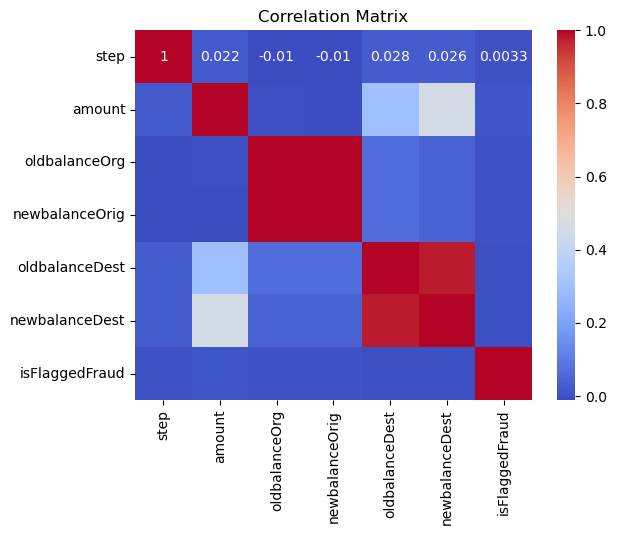

In [29]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# MODEL TRAINING

In [30]:
data['orig_balance_change'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['dest_balance_change'] = data['newbalanceDest'] - data['oldbalanceDest']


In [31]:
data = pd.get_dummies(data, columns=['type'], drop_first=True)


In [32]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)


In [33]:
#Defining Features and Target
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']


In [34]:
#Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
#Training a RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
#Evaluating the Model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[1906287      64]
 [    452    1983]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.81      0.88      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.91      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

